# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 10.2020
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2020


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (COMP)
# YAP ISLANDS MICRONESIA 91413

In [3]:
loc = 'Yap Islands 91413'

---

## Loading Data:

All data has been downloaded via the cds-api in a similar manner like depicted in 'IGRA_Comparison_Request.ipyn'. 

In [4]:
files = glob.glob('IGRA_91413/*/*.csv')
files_h = glob.glob('IGRA_H_91413/*/*.csv')
print(len(files) == len(files_h))

True


In [5]:
# IGRA and its harmonized version
for i in range(len(files)):
    if i == 0:
        igra = pandas.read_csv(files[i], header=12)
        igrah = pandas.read_csv(files_h[i], header=12)
    else:
        igra = igra.append(pandas.read_csv(files[i], header=12))
        igrah = igrah.append(pandas.read_csv(files_h[i], header=12))

In [6]:
# COMP - Comprehensive upper-air observation network from 1905 to present
files = glob.glob('COMP_91413/*/temperature.csv')
for i in range(len(files)):
    if i == 0:
        comp = pandas.read_csv(files[i])
    else:
        comp = comp.append(pandas.read_csv(files[i]))

In [7]:
comp = comp[comp.time < '2018-10'] # igra data is only available up to Oct.2018, so we shorten the comp data

## IGRA_H missing data:

It seems like something went wrong with the interpolation to standard pressure levels in IGRA_H. Most Values are available, but not those on standard pressure labels.


In [8]:
igrah

,station_name,report_timestamp,actual_time,report_id,location_longitude,location_latitude,height_of_station_above_sea_level,air_pressure,air_temperature,relative_humidity
0,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,8600,187.85,NaN
1,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,1400,223.95,NaN
2,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,49200,268.15,28.00
3,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,34600,251.55,19.00
4,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,55400,272.85,50.00
...,...,...,...,...,...,...,...,...,...,...
70695,FMM00091413,2018-12-31 12:00:00+00,2018-12-31 11:21:00+00,1841863,138.067,9.4833,15,3840,206.35,3.71
70696,FMM00091413,2018-12-31 12:00:00+00,2018-12-31 11:21:00+00,1841863,138.067,9.4833,15,7000,NaN,NaN
70697,FMM00091413,2018-12-31 12:00:00+00,2018-12-31 11:21:00+00,1841863,138.067,9.4833,15,1039,225.15,0.00
70698,FMM00091413,2018-12-31 12:00:00+00,2018-12-31 11:21:00+00,1841863,138.067,9.4833,15,9030,188.35,22.34


In [9]:
igrah[igrah.air_pressure == 10000]

,station_name,report_timestamp,actual_time,report_id,location_longitude,location_latitude,height_of_station_above_sea_level,air_pressure,air_temperature,relative_humidity
25,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,10000,NaN,NaN
51,FMM00091413,1978-01-02 00:00:00+00,1978-01-02 00:00:00+00,1845895,138.067,9.4833,15,10000,NaN,NaN
81,FMM00091413,1978-01-03 00:00:00+00,1978-01-03 00:00:00+00,1845904,138.067,9.4833,15,10000,NaN,NaN
129,FMM00091413,1978-01-04 00:00:00+00,1978-01-04 00:00:00+00,1846115,138.067,9.4833,15,10000,NaN,NaN
160,FMM00091413,1978-01-05 00:00:00+00,1978-01-05 00:00:00+00,1846121,138.067,9.4833,15,10000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
70238,FMM00091413,2018-12-29 12:00:00+00,2018-12-29 11:04:00+00,1851842,138.067,9.4833,15,10000,NaN,NaN
70366,FMM00091413,2018-12-30 00:00:00+00,2018-12-29 23:04:00+00,1850110,138.067,9.4833,15,10000,NaN,NaN
70486,FMM00091413,2018-12-30 12:00:00+00,2018-12-30 11:08:00+00,1851260,138.067,9.4833,15,10000,NaN,NaN
70527,FMM00091413,2018-12-31 00:00:00+00,2018-12-30 23:03:00+00,1843784,138.067,9.4833,15,10000,NaN,NaN


In [10]:
igrah[igrah.air_pressure == 20000]

,station_name,report_timestamp,actual_time,report_id,location_longitude,location_latitude,height_of_station_above_sea_level,air_pressure,air_temperature,relative_humidity
41,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,20000,NaN,NaN
69,FMM00091413,1978-01-02 00:00:00+00,1978-01-02 00:00:00+00,1845895,138.067,9.4833,15,20000,NaN,NaN
83,FMM00091413,1978-01-03 00:00:00+00,1978-01-03 00:00:00+00,1845904,138.067,9.4833,15,20000,NaN,NaN
108,FMM00091413,1978-01-04 00:00:00+00,1978-01-04 00:00:00+00,1846115,138.067,9.4833,15,20000,NaN,NaN
151,FMM00091413,1978-01-05 00:00:00+00,1978-01-05 00:00:00+00,1846121,138.067,9.4833,15,20000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
70306,FMM00091413,2018-12-29 12:00:00+00,2018-12-29 11:04:00+00,1851842,138.067,9.4833,15,20000,NaN,NaN
70350,FMM00091413,2018-12-30 00:00:00+00,2018-12-29 23:04:00+00,1850110,138.067,9.4833,15,20000,NaN,NaN
70480,FMM00091413,2018-12-30 12:00:00+00,2018-12-30 11:08:00+00,1851260,138.067,9.4833,15,20000,NaN,NaN
70567,FMM00091413,2018-12-31 00:00:00+00,2018-12-30 23:03:00+00,1843784,138.067,9.4833,15,20000,NaN,NaN


In [11]:
igrah[igrah.air_pressure == 50000]

,station_name,report_timestamp,actual_time,report_id,location_longitude,location_latitude,height_of_station_above_sea_level,air_pressure,air_temperature,relative_humidity
15,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,50000,NaN,NaN
49,FMM00091413,1978-01-02 00:00:00+00,1978-01-02 00:00:00+00,1845895,138.067,9.4833,15,50000,NaN,NaN
71,FMM00091413,1978-01-03 00:00:00+00,1978-01-03 00:00:00+00,1845904,138.067,9.4833,15,50000,NaN,NaN
120,FMM00091413,1978-01-04 00:00:00+00,1978-01-04 00:00:00+00,1846115,138.067,9.4833,15,50000,NaN,NaN
157,FMM00091413,1978-01-05 00:00:00+00,1978-01-05 00:00:00+00,1846121,138.067,9.4833,15,50000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
70294,FMM00091413,2018-12-29 12:00:00+00,2018-12-29 11:04:00+00,1851842,138.067,9.4833,15,50000,NaN,NaN
70375,FMM00091413,2018-12-30 00:00:00+00,2018-12-29 23:04:00+00,1850110,138.067,9.4833,15,50000,NaN,NaN
70485,FMM00091413,2018-12-30 12:00:00+00,2018-12-30 11:08:00+00,1851260,138.067,9.4833,15,50000,NaN,NaN
70577,FMM00091413,2018-12-31 00:00:00+00,2018-12-30 23:03:00+00,1843784,138.067,9.4833,15,50000,NaN,NaN


In [12]:
igrah[igrah.air_pressure == 85000]

,station_name,report_timestamp,actual_time,report_id,location_longitude,location_latitude,height_of_station_above_sea_level,air_pressure,air_temperature,relative_humidity
6,FMM00091413,1978-01-01 00:00:00+00,1978-01-01 00:00:00+00,1846819,138.067,9.4833,15,85000,NaN,NaN
54,FMM00091413,1978-01-02 00:00:00+00,1978-01-02 00:00:00+00,1845895,138.067,9.4833,15,85000,NaN,NaN
89,FMM00091413,1978-01-03 00:00:00+00,1978-01-03 00:00:00+00,1845904,138.067,9.4833,15,85000,NaN,NaN
124,FMM00091413,1978-01-04 00:00:00+00,1978-01-04 00:00:00+00,1846115,138.067,9.4833,15,85000,NaN,NaN
168,FMM00091413,1978-01-05 00:00:00+00,1978-01-05 00:00:00+00,1846121,138.067,9.4833,15,85000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
70215,FMM00091413,2018-12-29 12:00:00+00,2018-12-29 11:04:00+00,1851842,138.067,9.4833,15,85000,NaN,NaN
70260,FMM00091413,2018-12-30 00:00:00+00,2018-12-29 23:04:00+00,1850110,138.067,9.4833,15,85000,NaN,NaN
70425,FMM00091413,2018-12-30 12:00:00+00,2018-12-30 11:08:00+00,1851260,138.067,9.4833,15,85000,NaN,NaN
70508,FMM00091413,2018-12-31 00:00:00+00,2018-12-30 23:03:00+00,1843784,138.067,9.4833,15,85000,NaN,NaN


---

---

# Therefore we will compare IGRA to COMP
### Please keep in mind that we just reassign the variable. This way we can change it later! 

In [13]:
igrah = igra

---

---

## Getting the data to the same length for comparison (IGRA_H vs COMP) on 4 standard pressure leveles:
there are more ascents in the COMP data, it will be reduced to only ascents starting at 00:00 and 12:00. <br>
Sometimes the ascents were not exactly at 00:00 or 12:00, but were assigned to those profiles.<br>
In the remaining data there are some points in time, which are not in both datasets - those will be removed too.


In [14]:
print('Elements in IGRA_H Temperature: ' + str(len(igrah)))
print('NAN in IGRA_H Temperature: ' + str(igrah.air_temperature.isnull().sum()))


Elements in IGRA_H Temperature: 1894435
NAN in IGRA_H Temperature: 0


In [15]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
missing_i = []
missing_c = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    datai = igra[igra.air_pressure == i]
    datai.report_timestamp = pandas.to_datetime(datai.report_timestamp, utc=True)
    datah = igrah[igrah.air_pressure == i]
    datah.report_timestamp = pandas.to_datetime(datah.report_timestamp, utc=True)
    datac = comp[comp.plev == i]
    datar = (datac[datac.time.str[-8:] == '12:00:00'].append(datac[datac.time.str[-8:] == '00:00:00'])).sort_values('time')
    datar.time = pandas.to_datetime(datar.time, utc=True)
    datac.time = pandas.to_datetime(datac.time, utc=True)

    print('Length of COMP: ' + str(len(datac.time)))
    print('Missing Values of COMP: ' + str(datac.ta.isnull().sum()))
    print('Length of reduced COMP: ' + str(len(datar.time)))
    print('Missing Values of reduced COMP: ' + str(datar.ta.isnull().sum()))
    print('Length of IGRA: ' + str(len(datai.report_timestamp)))
    print('Missing Values of IGRA: ' + str(datai.air_temperature.isnull().sum()))
    print('Length of IGRA_H: ' + str(len(datah.report_timestamp)))
    print('Missing Values of IGRA_H: ' + str(datah.air_temperature.isnull().sum()))
    print('Length difference of reduced COMP to IGRA: ' + str(len(datar.time)-len(datai.report_timestamp)))
    print('Length difference of reduced COMP to IGRA_H: ' + str(len(datar.time)-len(datah.report_timestamp)))
    missingtimes1 = []
    for i in datar.time:
        if len(datah[datah.report_timestamp == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes1.append(i)
            datar = datar[datar.time != i] # -> kicking it out, if not
    print('Missing Timestamps in IGRA_H relative to reduced COMP: ' + str(len(missingtimes1)))
    missingtimes2 = []
    for i in datah.report_timestamp:
        if len(datar[datar.time == i]) <1: # -> checking if timestamp is also in the other dataset
            missingtimes2.append(i)
            datah = datah[datah.report_timestamp != i] # -> kicking it out, if not
            datai = datai[datai.report_timestamp != i] # -> kicking it out, if not
    print('Missing Timestamps in reduced COMP relative to IGRA_H: ' + str(len(missingtimes2)))
    comp_adjusted.append(datar)
    igra_h_adjusted.append(datah)
    igra_adjusted.append(datai)
    missing_i.append(len(missingtimes2))
    missing_c.append(len(missingtimes1))

--- 
pressure level: 10000
Length of COMP: 38686
Missing Values of COMP: 0
Length of reduced COMP: 23213
Missing Values of reduced COMP: 0
Length of IGRA: 23262
Missing Values of IGRA: 0
Length of IGRA_H: 23262
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: -49
Length difference of reduced COMP to IGRA_H: -49


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 1303
Missing Timestamps in reduced COMP relative to IGRA_H: 1352
--- 
pressure level: 20000
Length of COMP: 39777
Missing Values of COMP: 0
Length of reduced COMP: 24009
Missing Values of reduced COMP: 0
Length of IGRA: 24303
Missing Values of IGRA: 0
Length of IGRA_H: 24303
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: -294
Length difference of reduced COMP to IGRA_H: -294


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 1335
Missing Timestamps in reduced COMP relative to IGRA_H: 1629
--- 
pressure level: 50000
Length of COMP: 40532
Missing Values of COMP: 0
Length of reduced COMP: 24530
Missing Values of reduced COMP: 0
Length of IGRA: 24660
Missing Values of IGRA: 0
Length of IGRA_H: 24660
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: -130
Length difference of reduced COMP to IGRA_H: -130


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 1368
Missing Timestamps in reduced COMP relative to IGRA_H: 1498
--- 
pressure level: 85000
Length of COMP: 40674
Missing Values of COMP: 0
Length of reduced COMP: 24584
Missing Values of reduced COMP: 0
Length of IGRA: 24738
Missing Values of IGRA: 0
Length of IGRA_H: 24738
Missing Values of IGRA_H: 0
Length difference of reduced COMP to IGRA: -154
Length difference of reduced COMP to IGRA_H: -154


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Missing Timestamps in IGRA_H relative to reduced COMP: 1364
Missing Timestamps in reduced COMP relative to IGRA_H: 1518


## Missing data in the data sets

Now we display the missing data in the datasets, those bars labeled as COMP depict the data which is missing in the COMP data set but is available in the IGRA data set; and vice versa.

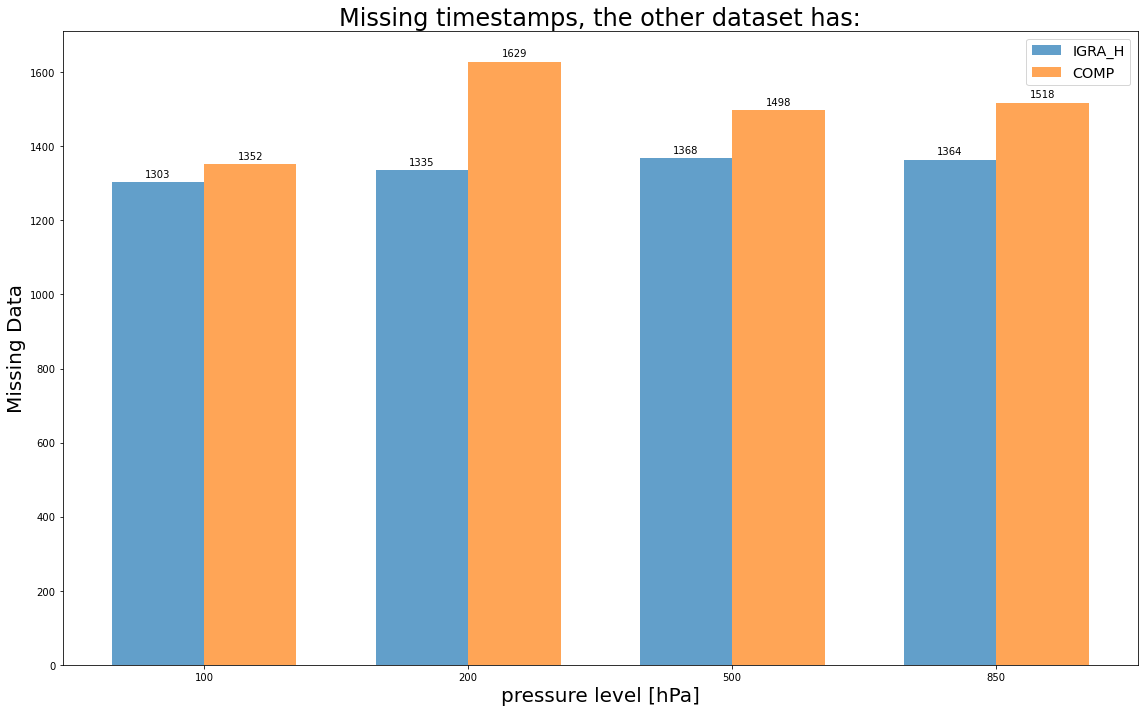

In [16]:
pressl = [100, 200, 500, 850]
x = np.arange(len(pressl))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, missing_c, width, label='IGRA_H', alpha=0.7)
rects2 = ax.bar(x + width/2, missing_i, width, label='COMP', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Missing Data')
ax.set_xlabel('pressure level [hPa]')
ax.set_title('Missing timestamps, the other dataset has:')
ax.set_xticks(x)
ax.set_xticklabels(pressl)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

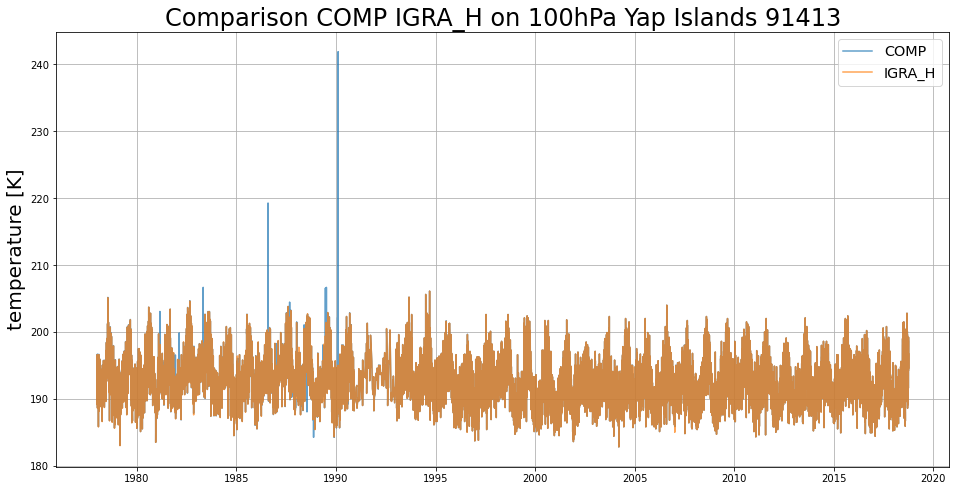

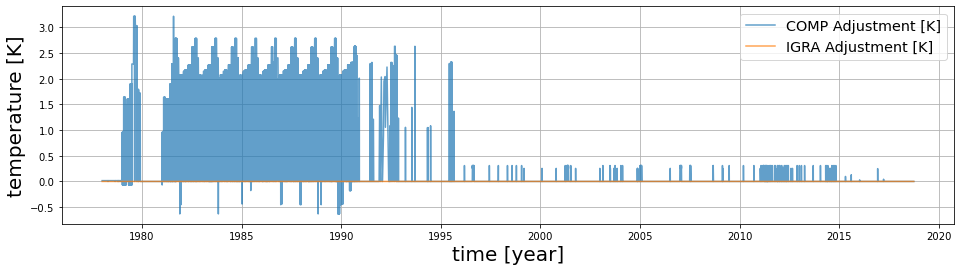

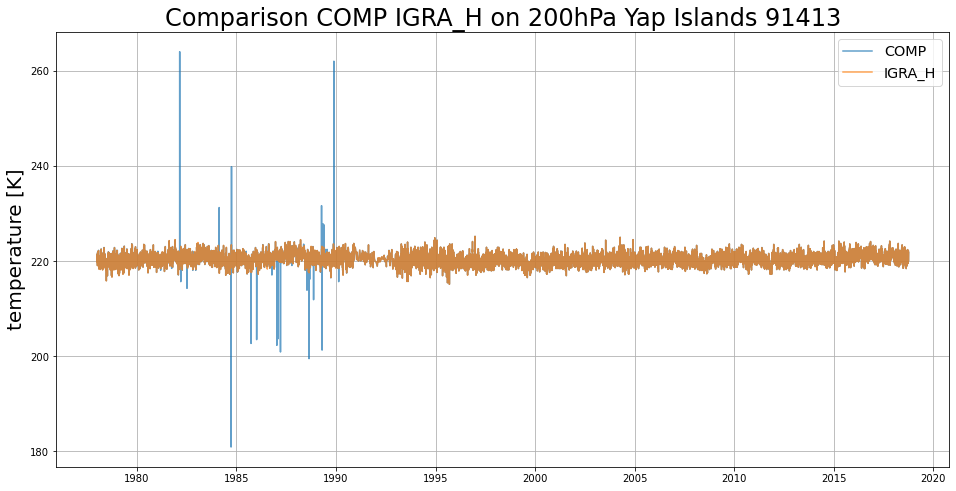

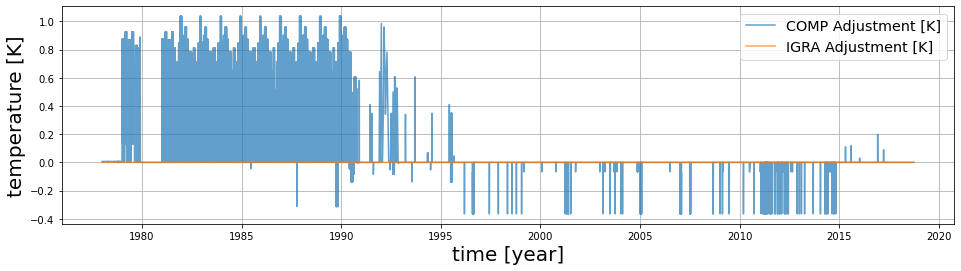

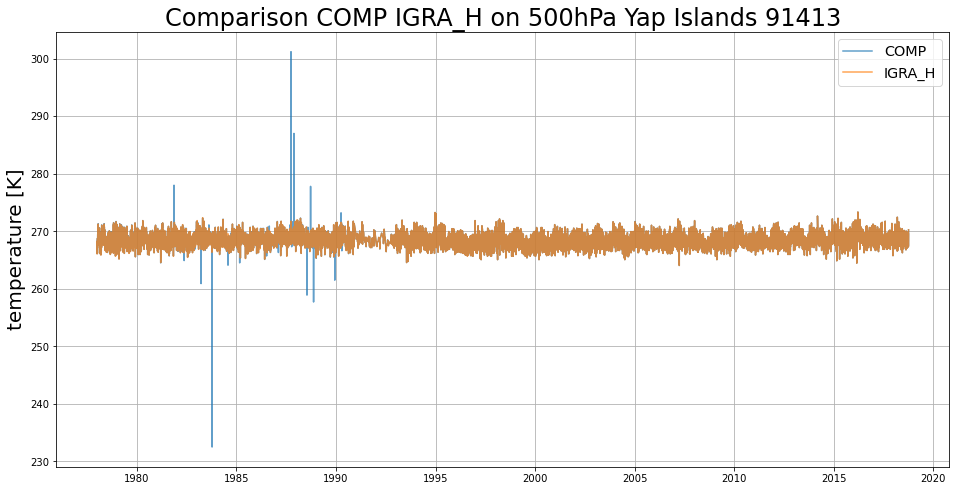

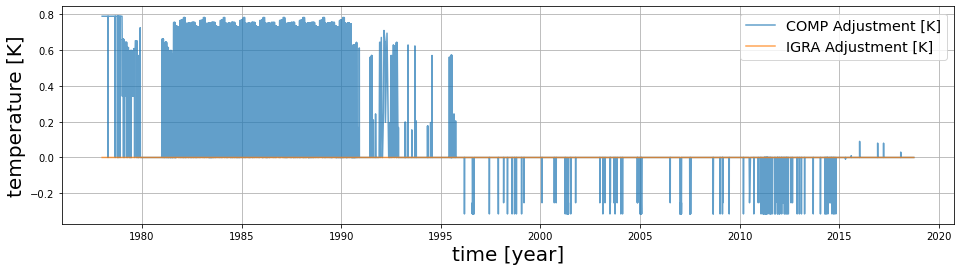

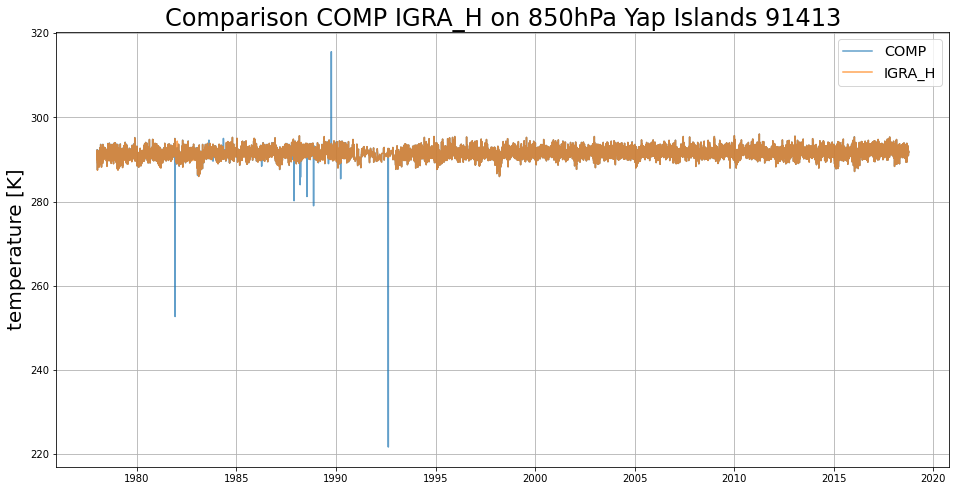

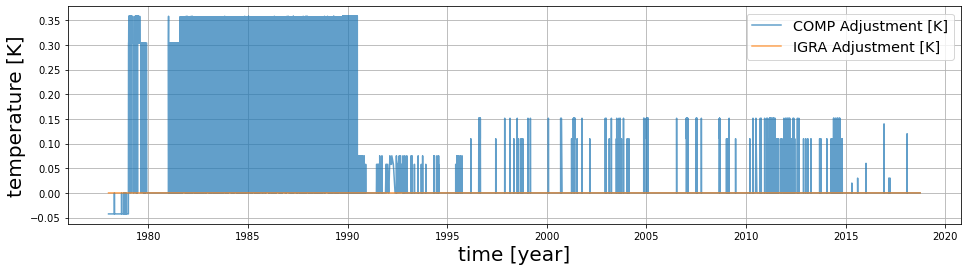

In [17]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
 

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


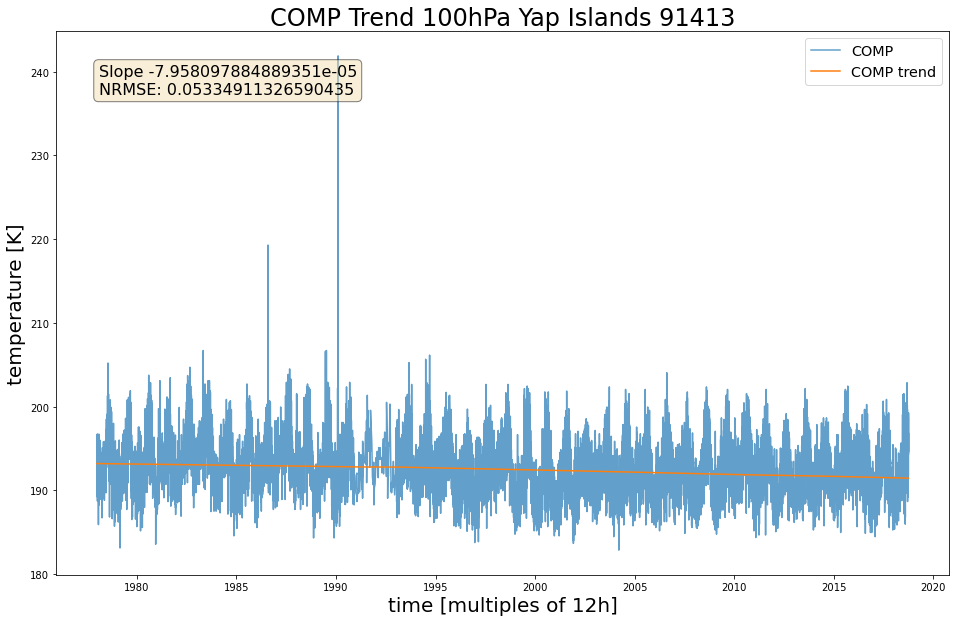

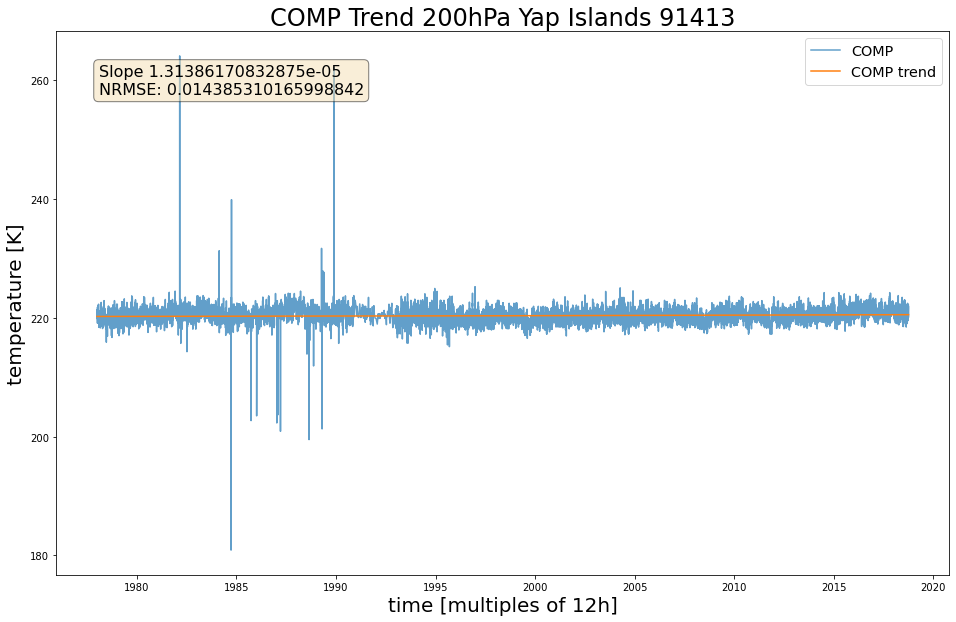

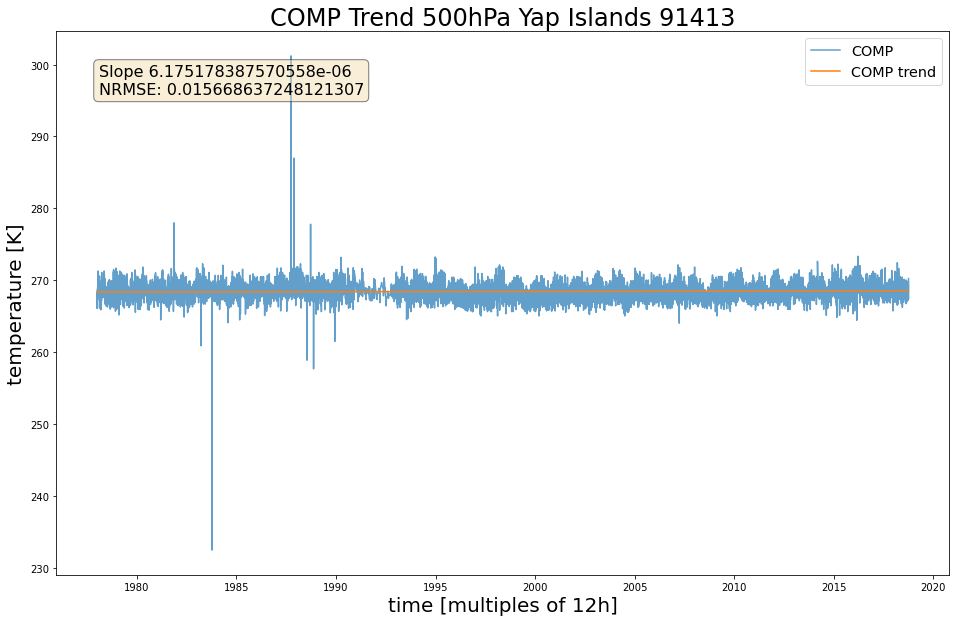

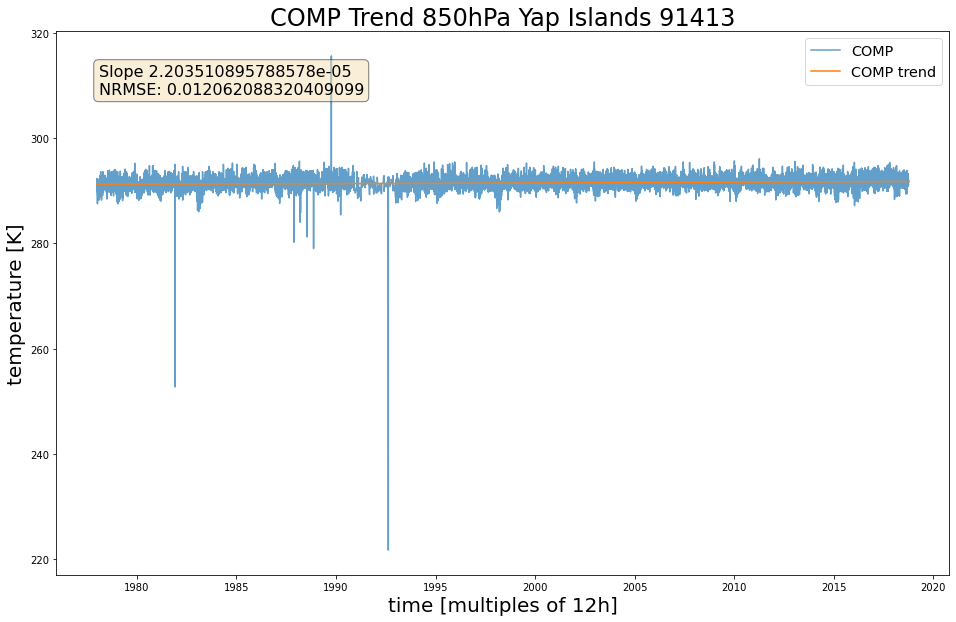

In [18]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)
    

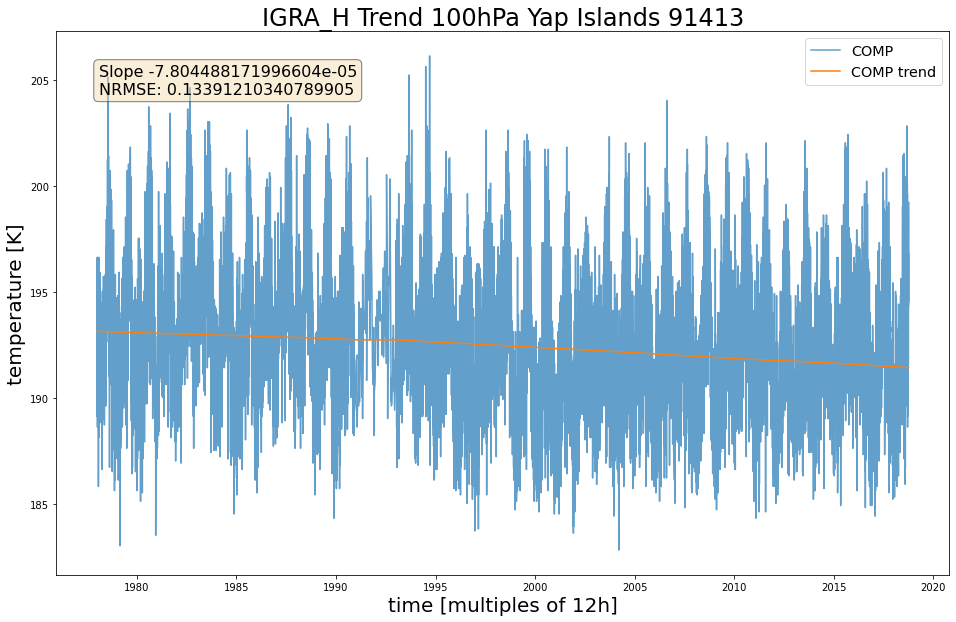

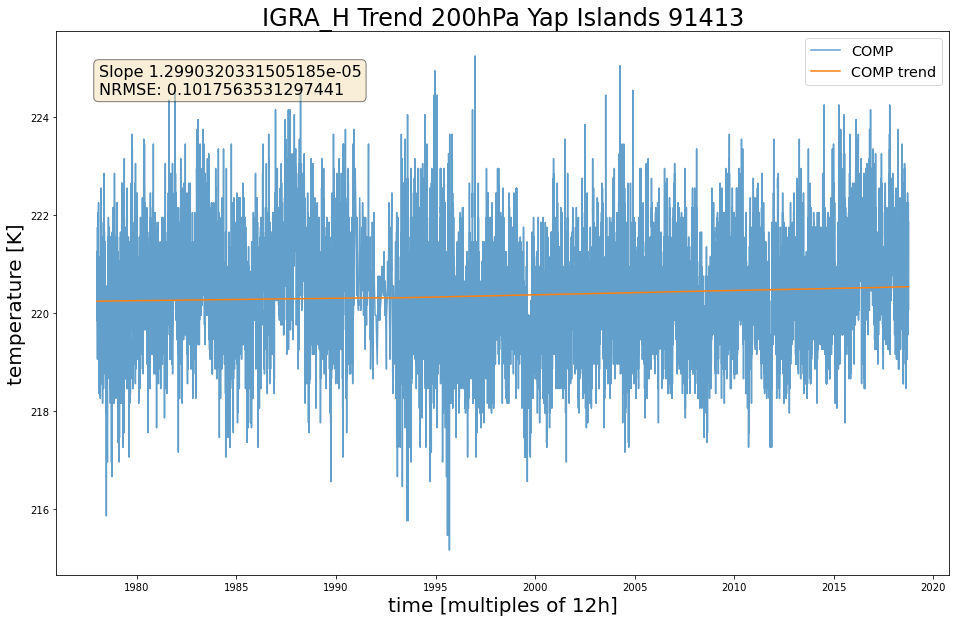

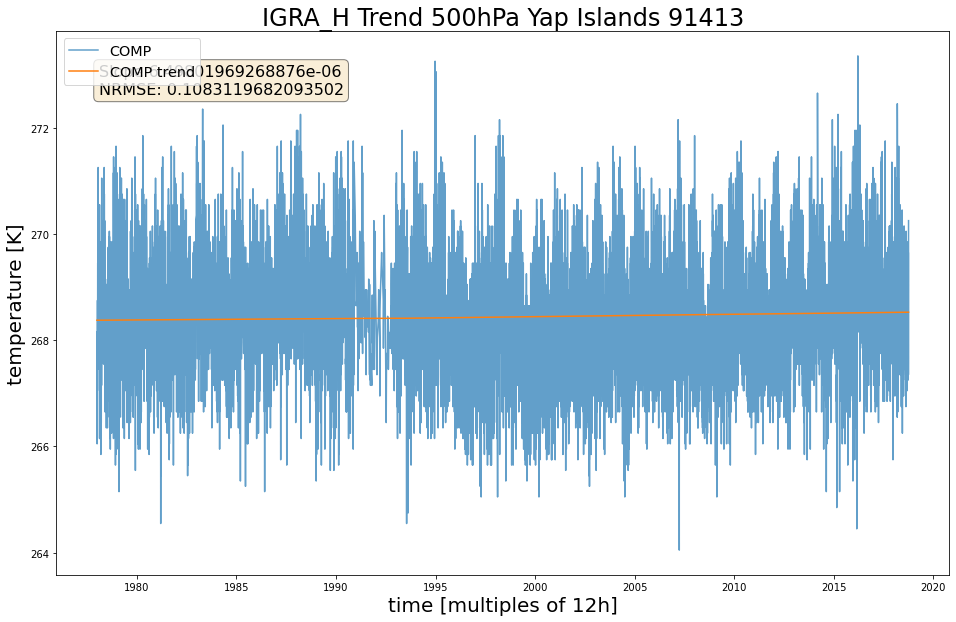

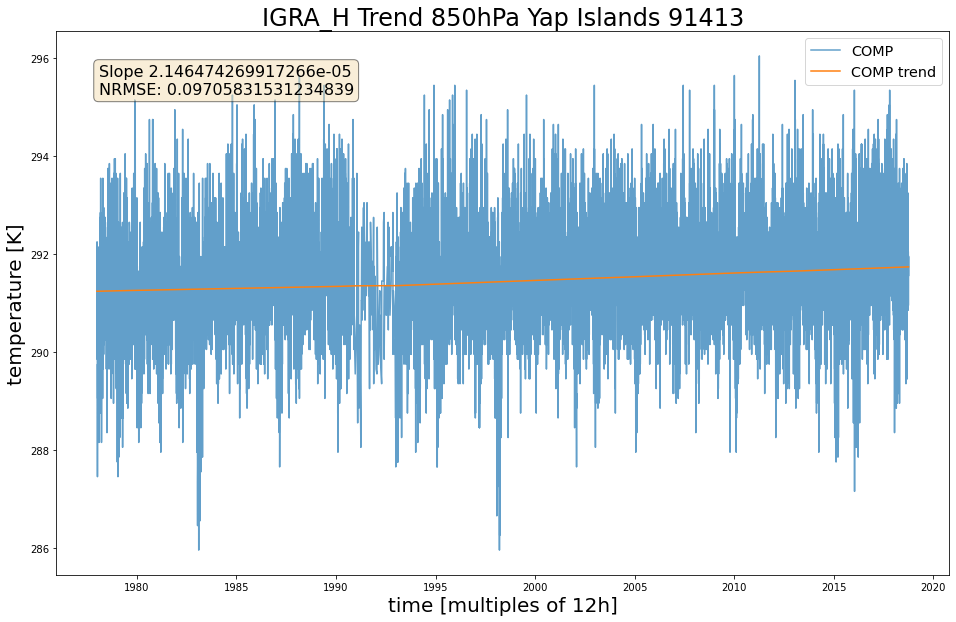

In [19]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    b = igra_h_adjusted[i]
    xax = np.asarray(b.report_timestamp)
    
    selected = b.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [20]:
comp_ma = []
igra_h_ma = []
igra_ma = []
for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

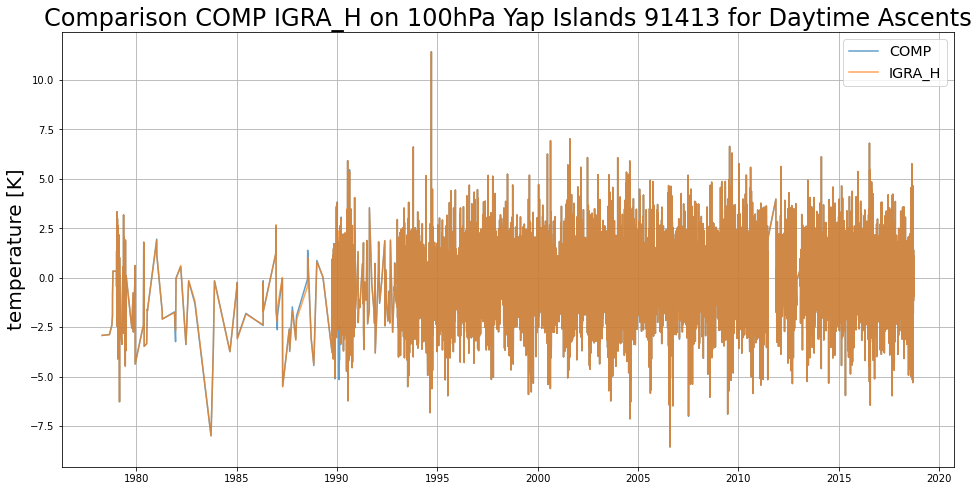

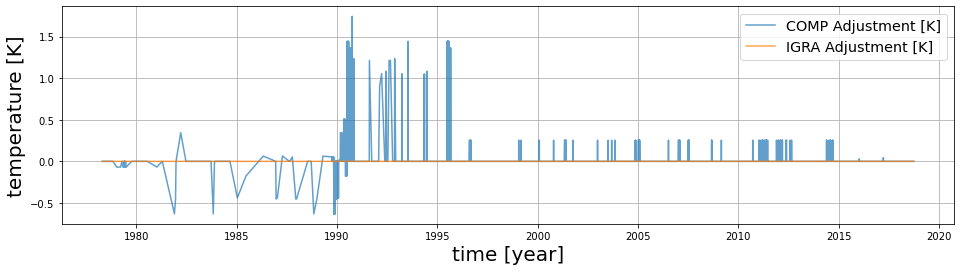

COMP Adjustment MEAN: 0.011497351869136089
COMP Adjustment MIN: -0.6325109999999999
COMP Adjustment MAX: 1.7450583999999998
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


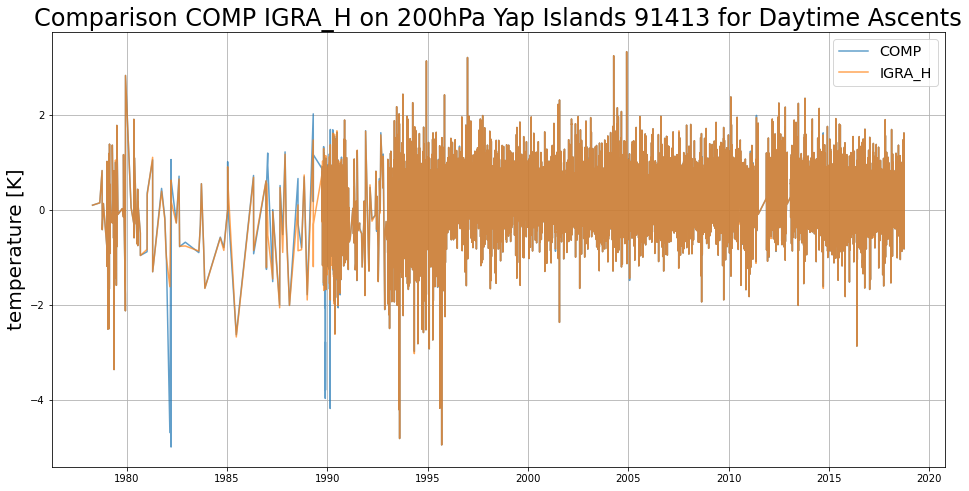

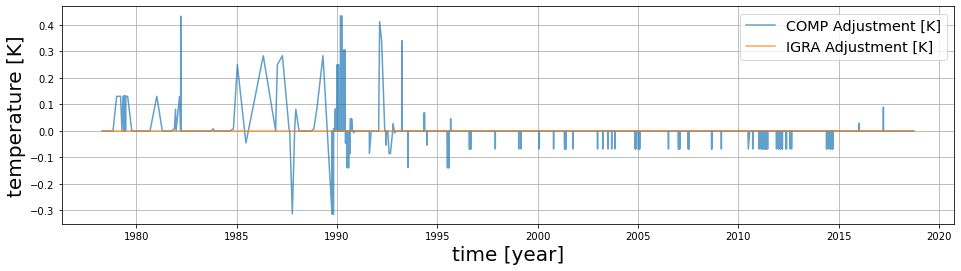

COMP Adjustment MEAN: 0.0034016813508036866
COMP Adjustment MIN: -0.31289652
COMP Adjustment MAX: 0.43281507
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


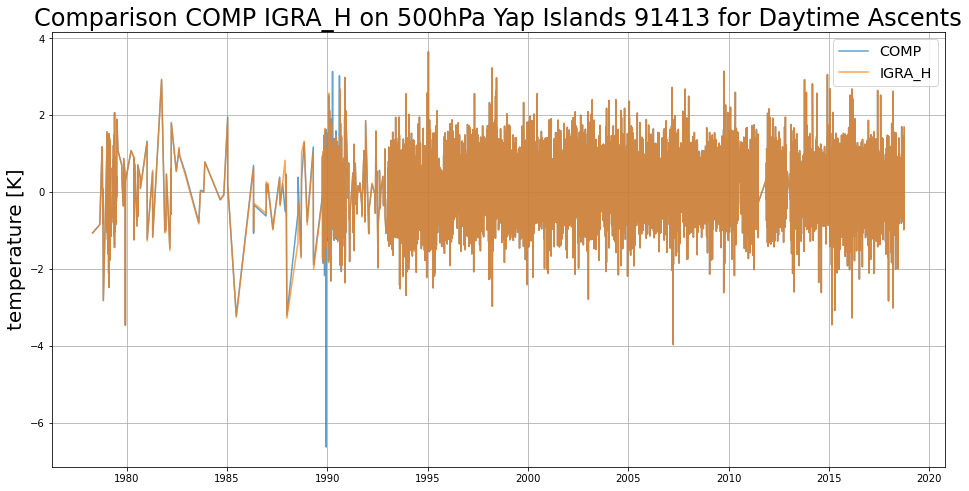

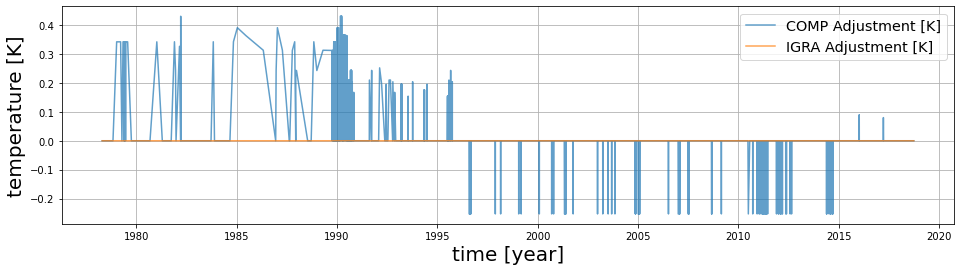

COMP Adjustment MEAN: 0.009565694541429472
COMP Adjustment MIN: -0.25318605
COMP Adjustment MAX: 0.430813
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


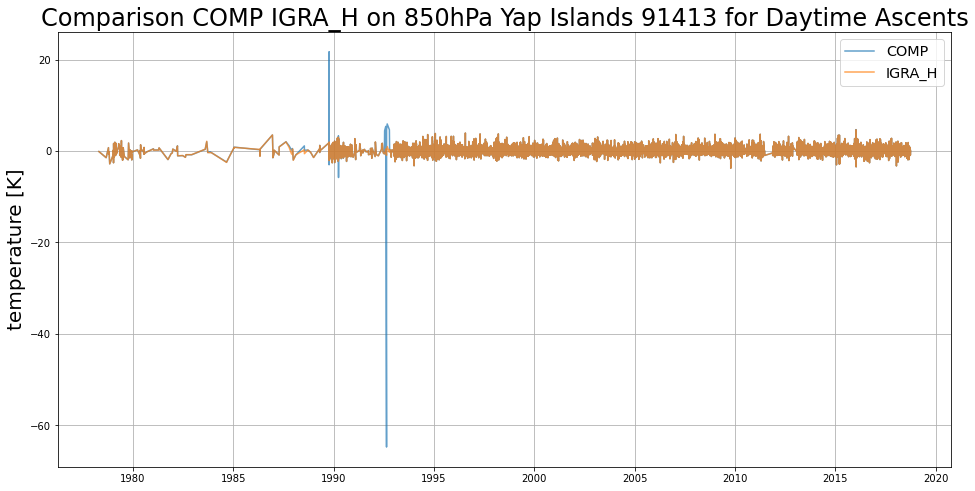

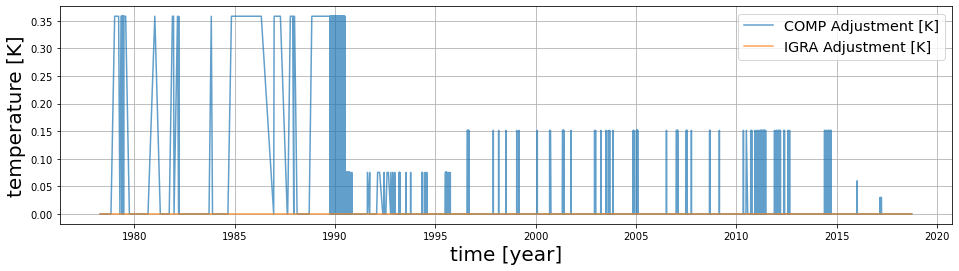

COMP Adjustment MEAN: 0.01722234367271583
COMP Adjustment MIN: 0.0
COMP Adjustment MAX: 0.35835123
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


In [21]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))


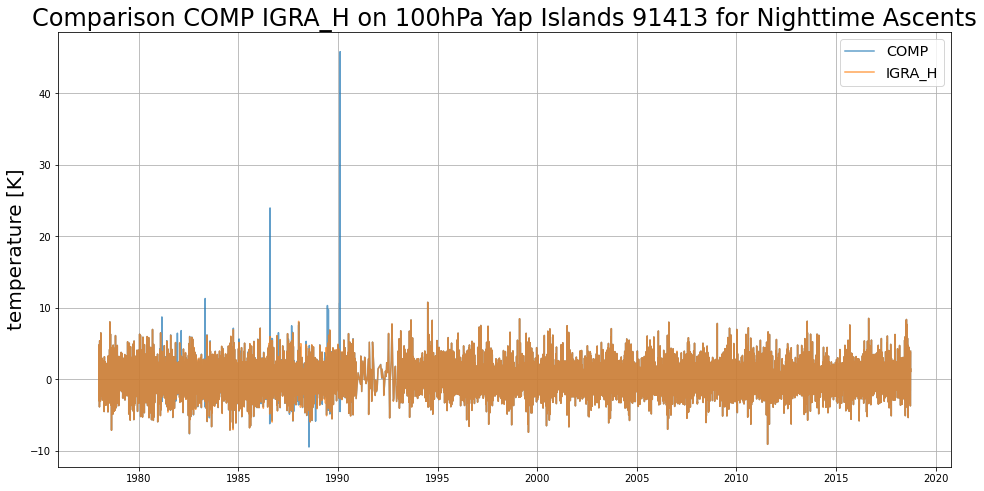

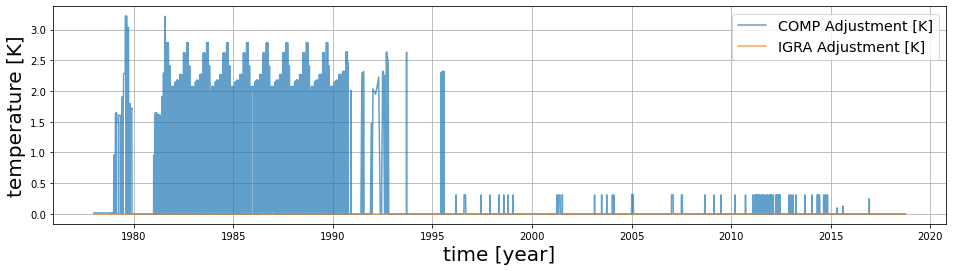

COMP Adjustment MEAN: 0.516298473441119
COMP Adjustment MIN: 0.0
COMP Adjustment MAX: 3.2179632000000002
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


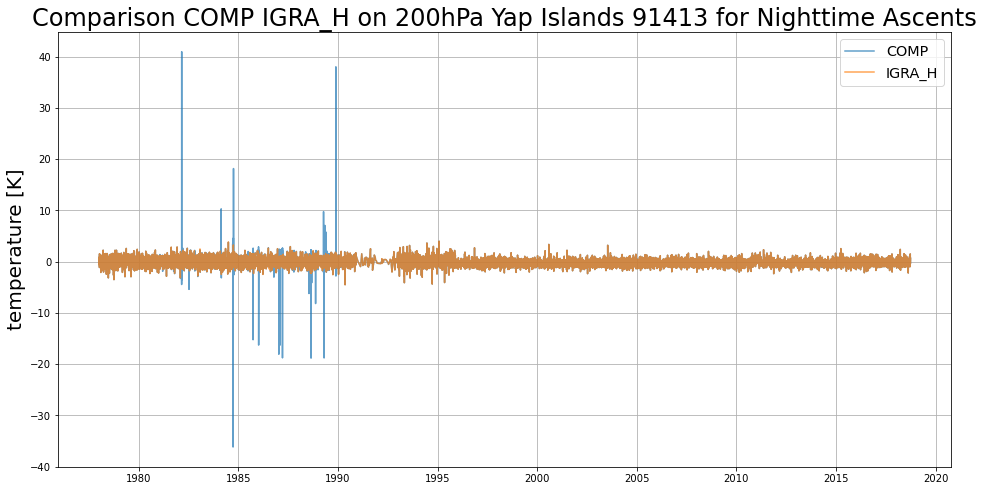

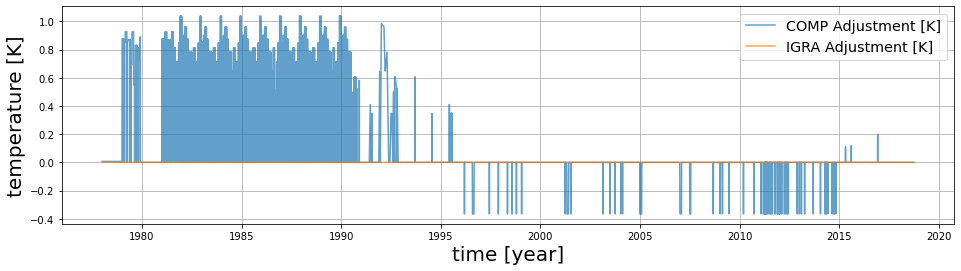

COMP Adjustment MEAN: 0.16912701184856094
COMP Adjustment MIN: -0.36563409999999996
COMP Adjustment MAX: 1.0363239
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


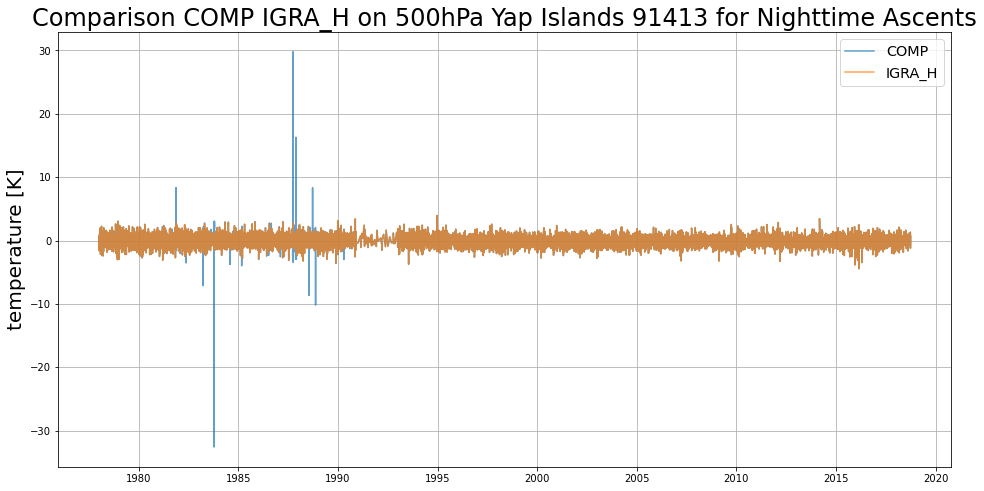

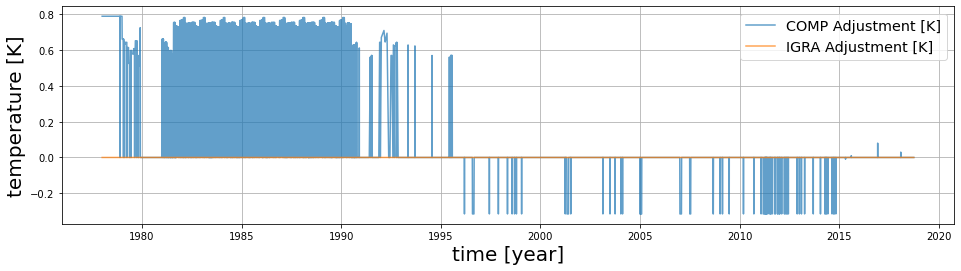

COMP Adjustment MEAN: 0.17930420499009214
COMP Adjustment MIN: -0.31563047
COMP Adjustment MAX: 0.7896059
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


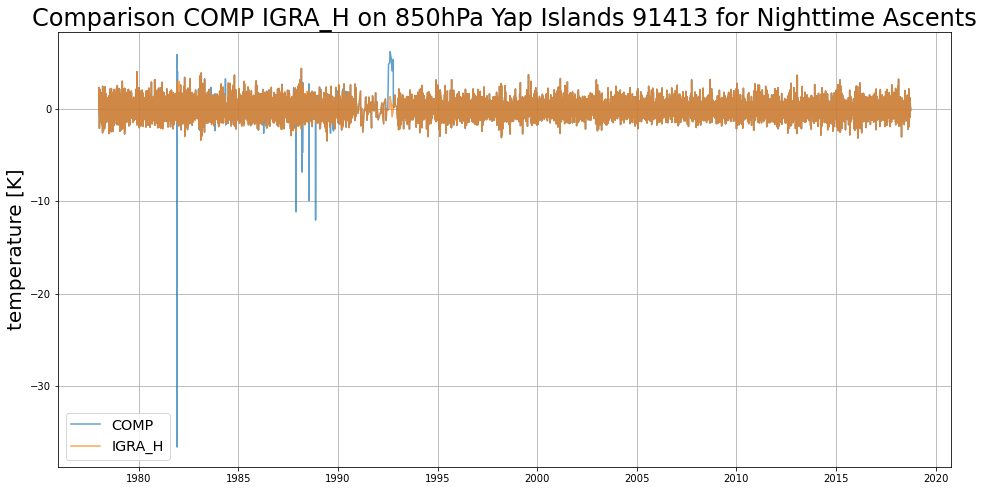

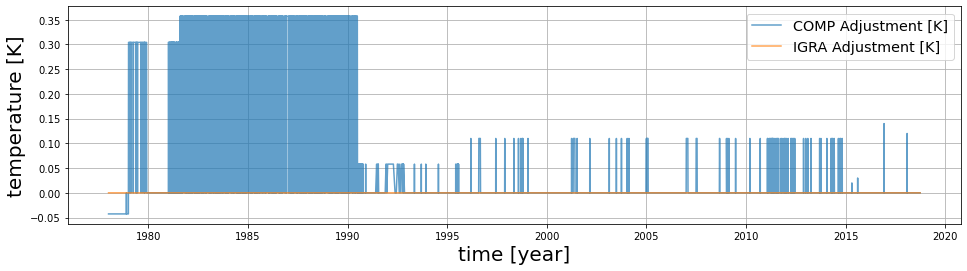

COMP Adjustment MEAN: 0.0771954528779864
COMP Adjustment MIN: -0.04264197
COMP Adjustment MAX: 0.35707712
IGRA Adjustment MEAN: 0.0
IGRA Adjustment MIN: 0.0
IGRA Adjustment MAX: 0.0


In [22]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(ca.mean()))
    print('COMP Adjustment MIN: ' + str(ca.min()))
    print('COMP Adjustment MAX: ' + str(ca.max()))
    print('IGRA Adjustment MEAN: ' + str(ia.mean()))
    print('IGRA Adjustment MIN: ' + str(ia.min()))
    print('IGRA Adjustment MAX: ' + str(ia.max()))

## Difference:

Finding the difference between the two data sets by subtracting them.

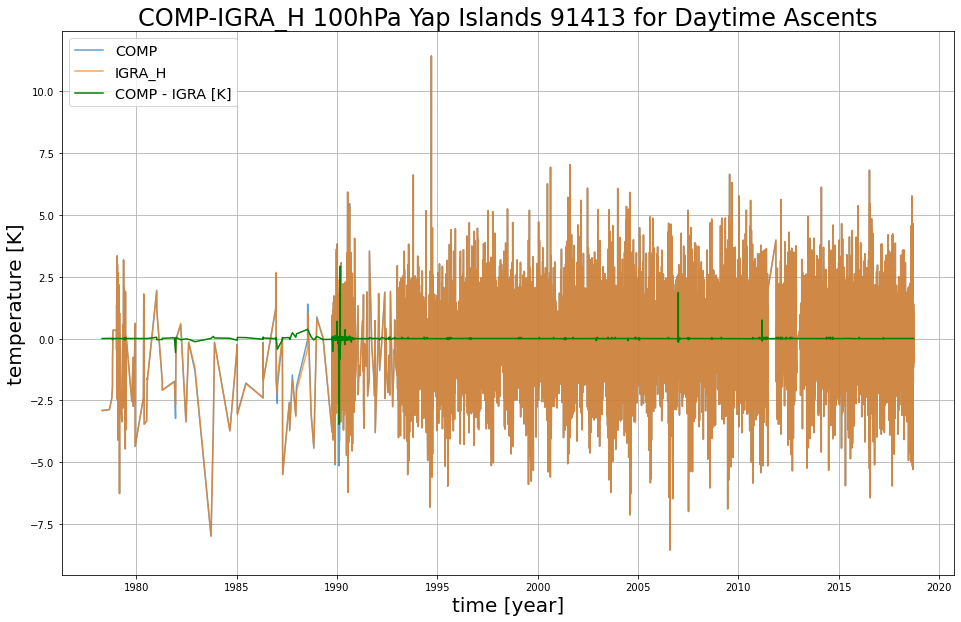

DIFF MEAN: -0.002747412248689522
DIFF MIN: -3.4714285714285893
DIFF MAX: 2.93214285714285


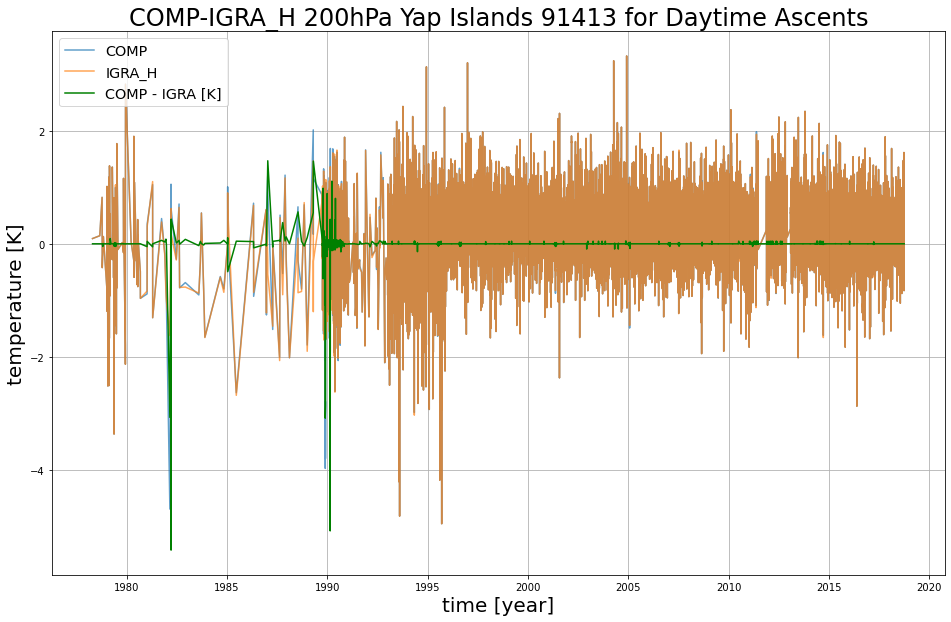

DIFF MEAN: -0.002530846243340866
DIFF MIN: -5.4142857142857395
DIFF MAX: 1.4678571428571558


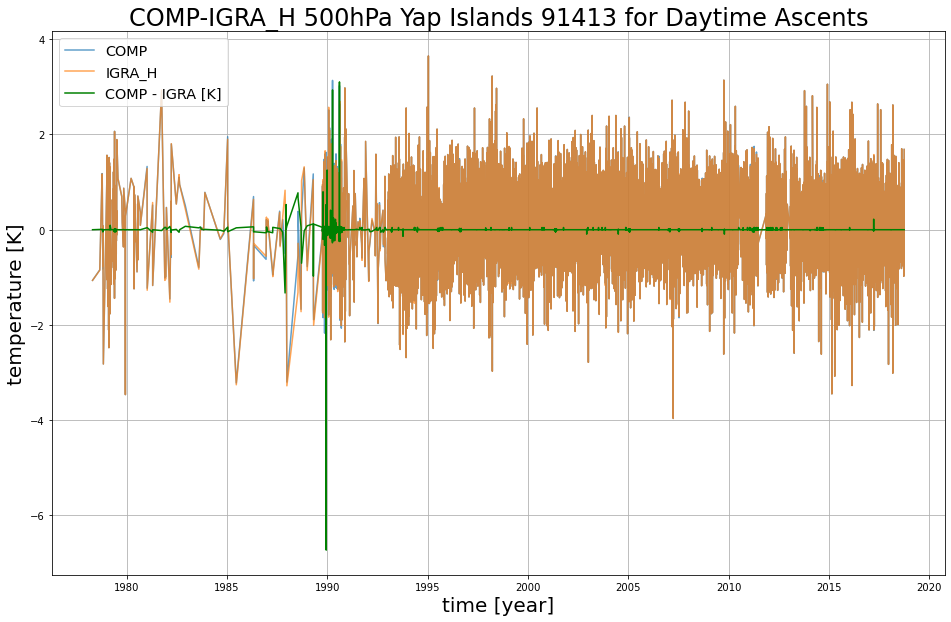

DIFF MEAN: 0.00011520737327190275
DIFF MIN: -6.728571428571456
DIFF MAX: 3.103571428571456


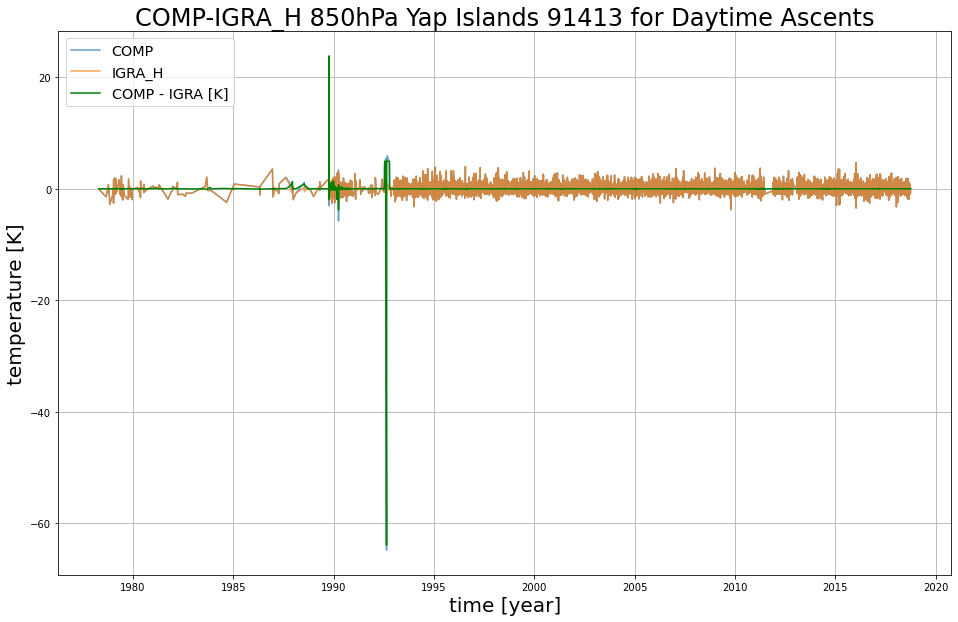

DIFF MEAN: -0.0022489547586580535
DIFF MIN: -63.853571428571456
DIFF MAX: 23.81071428571437


In [23]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

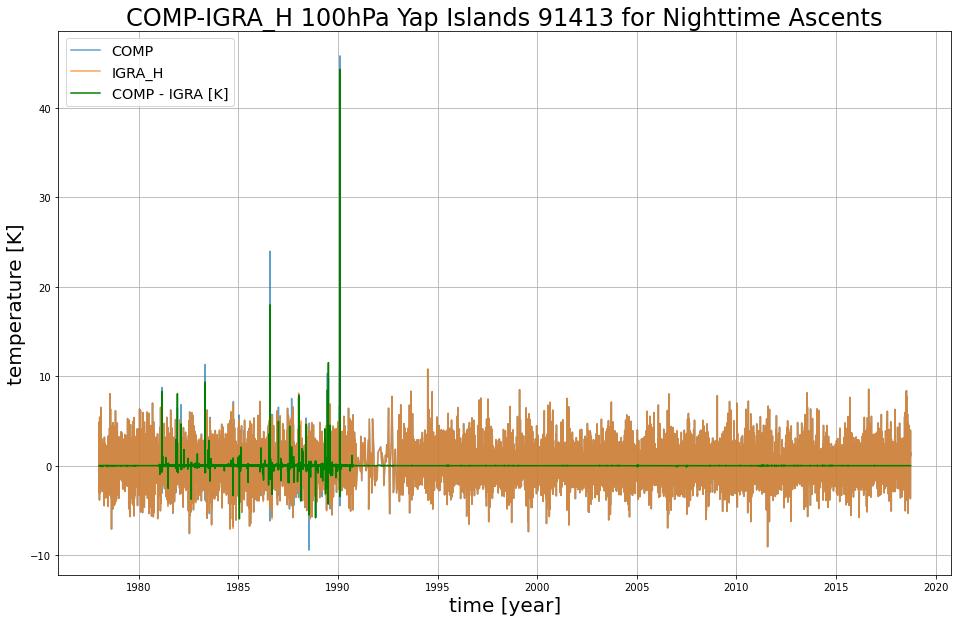

DIFF MEAN: 0.0017773886513544807
DIFF MIN: -5.9607142857142605
DIFF MAX: 44.33571428571429


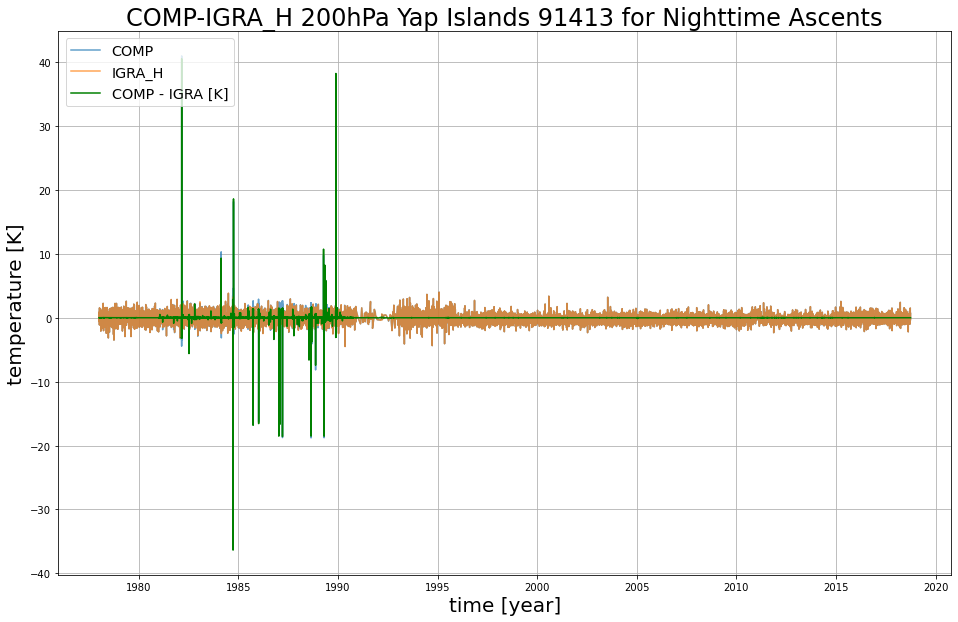

DIFF MEAN: 0.001768314881041697
DIFF MIN: -36.36785714285713
DIFF MAX: 40.5321428571429


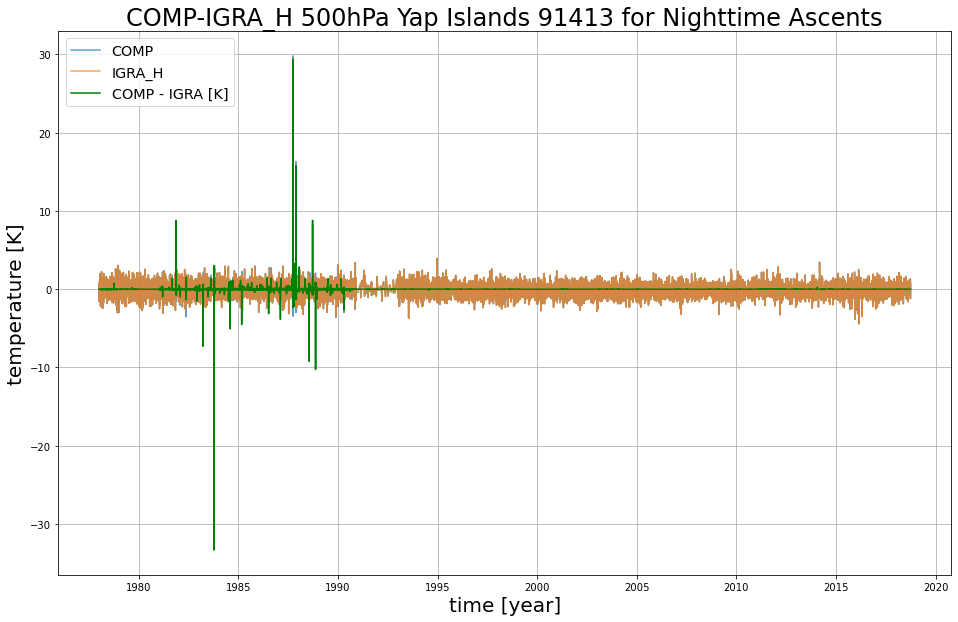

DIFF MEAN: -8.173860360199508e-05
DIFF MIN: -33.35000000000002
DIFF MAX: 29.38214285714281


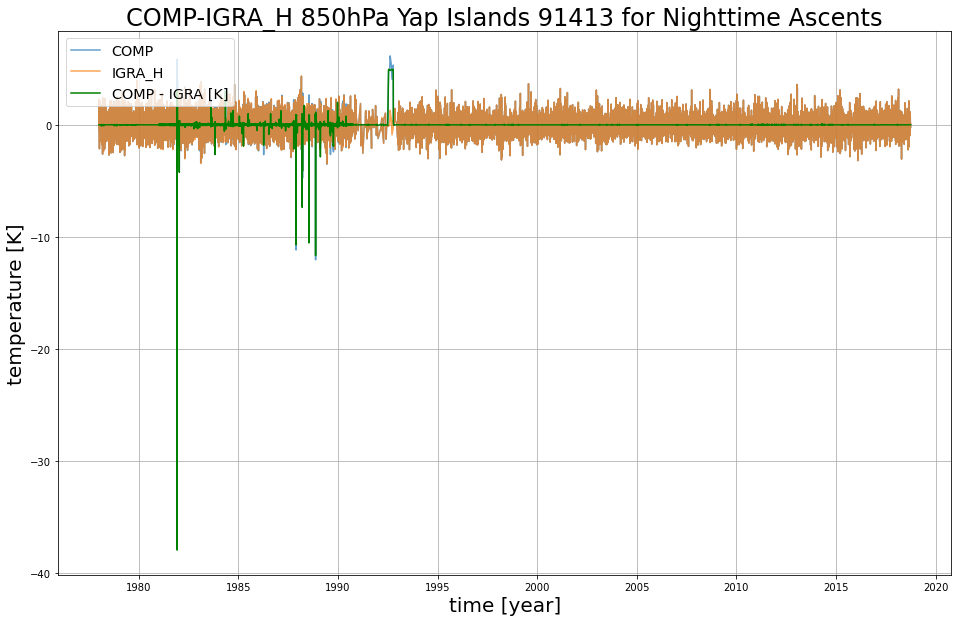

DIFF MEAN: 0.001564571178072933
DIFF MIN: -37.94642857142861
DIFF MAX: 4.953571428571422


In [24]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments:

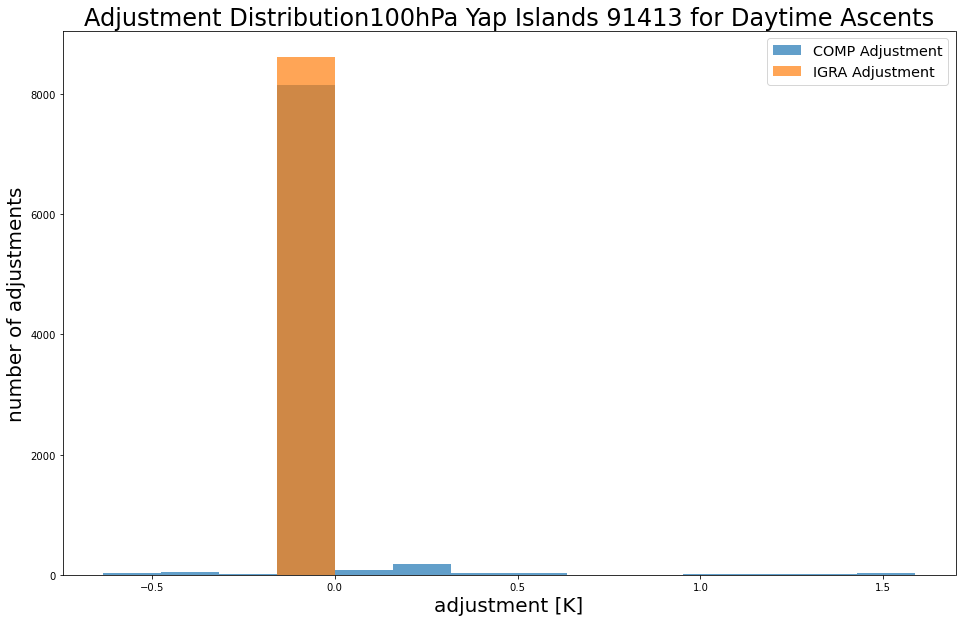

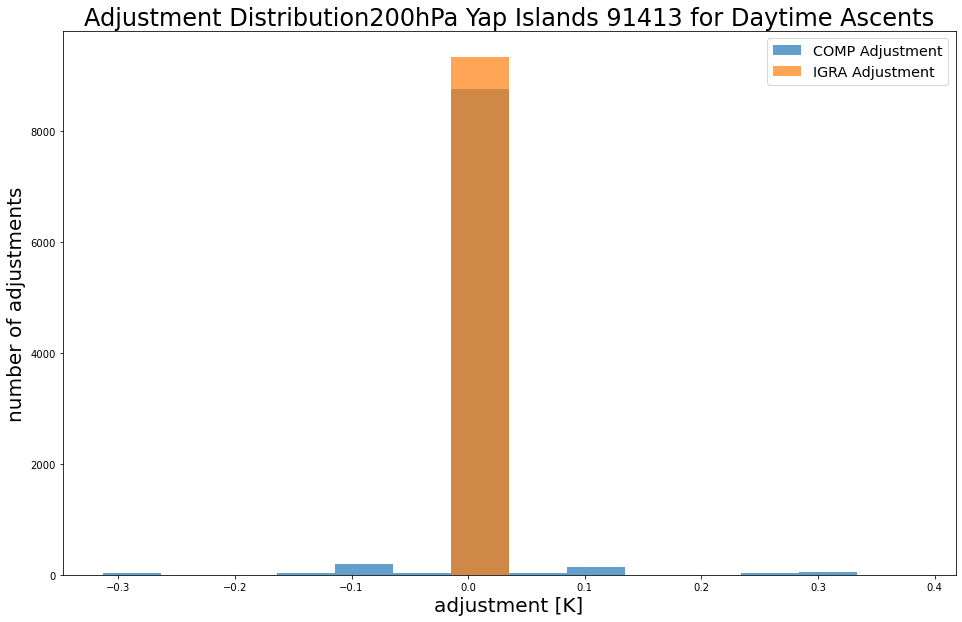

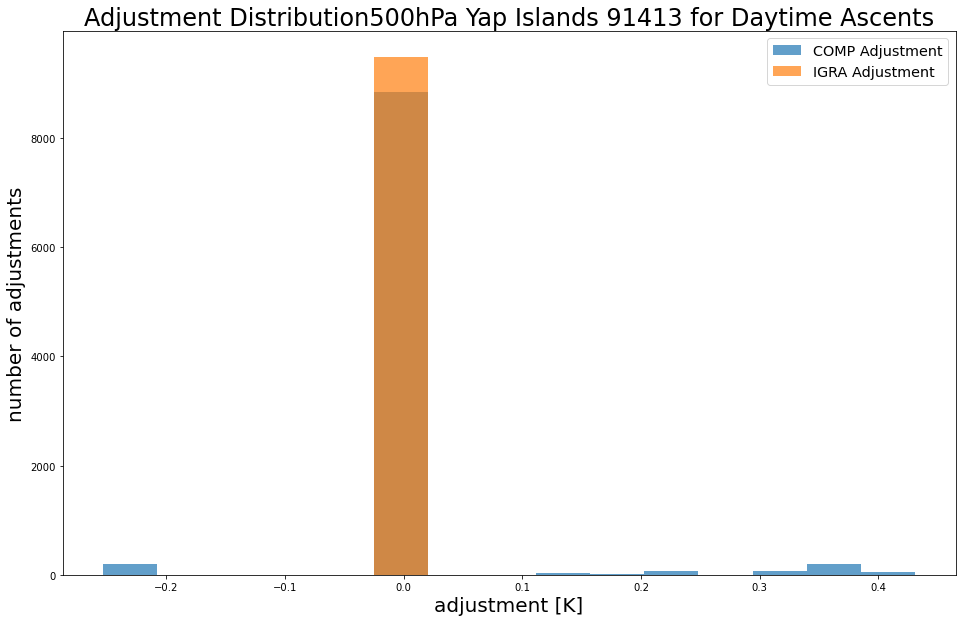

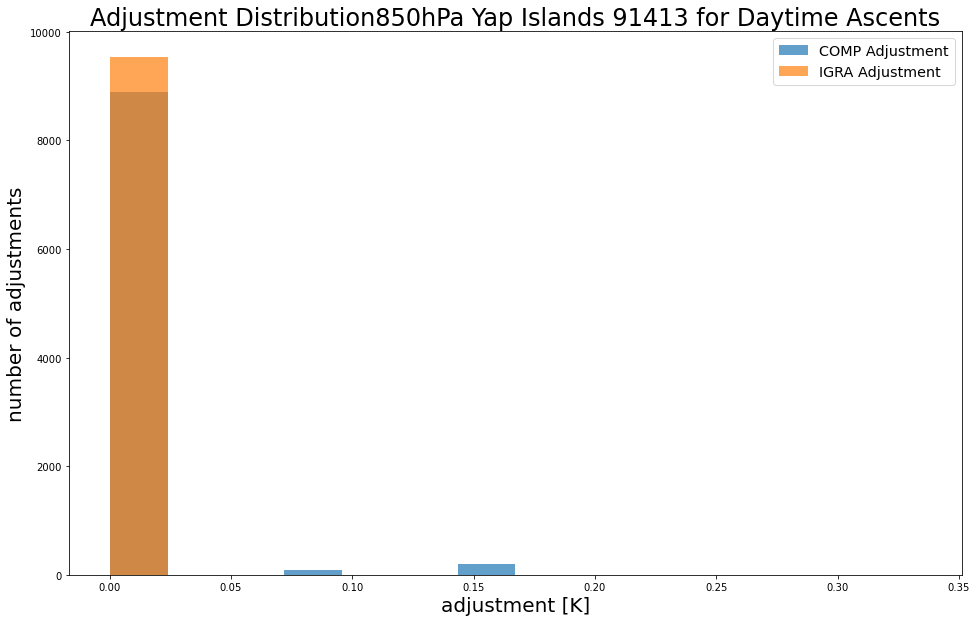

In [25]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

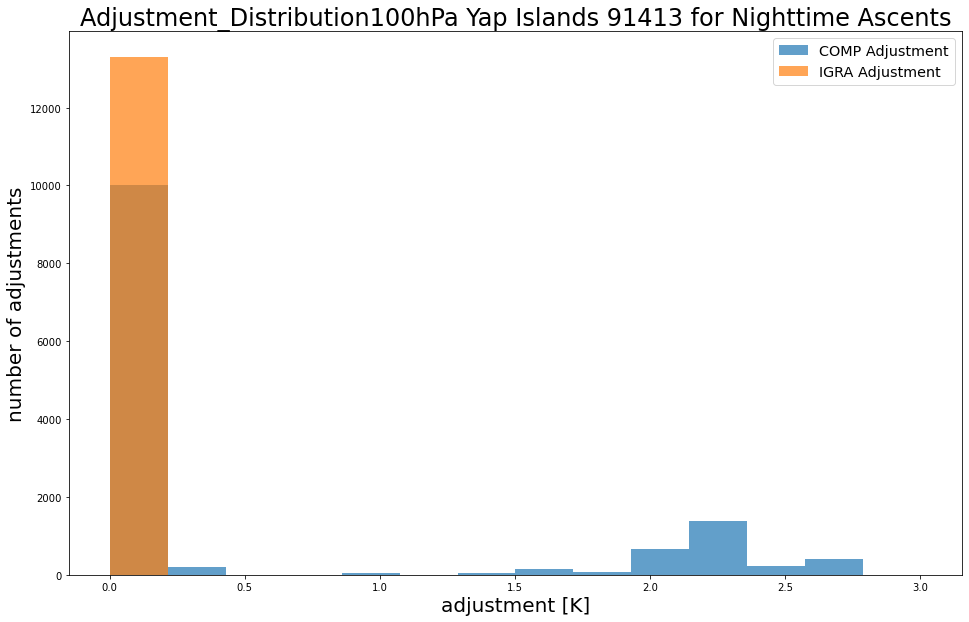

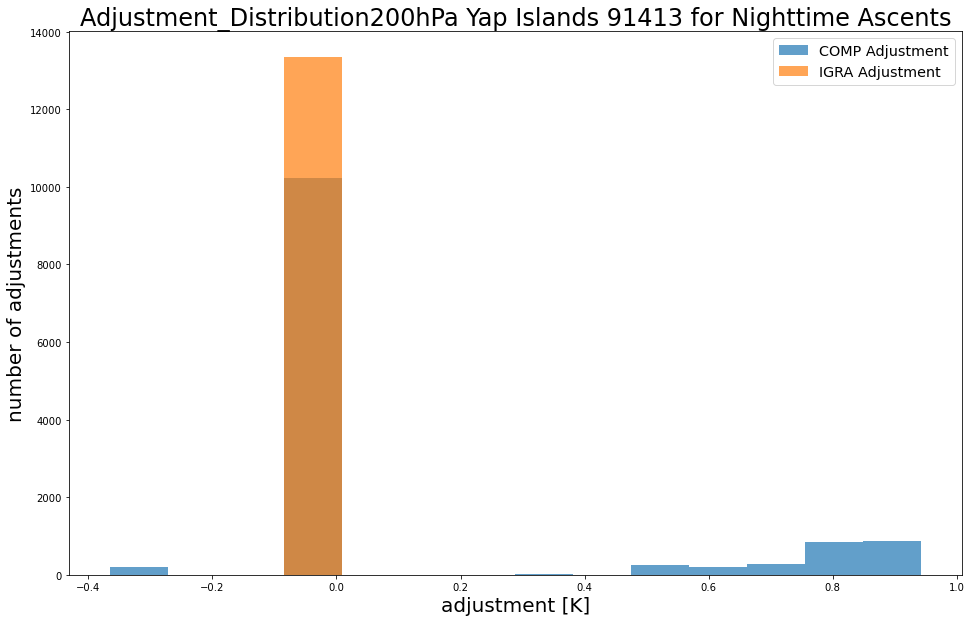

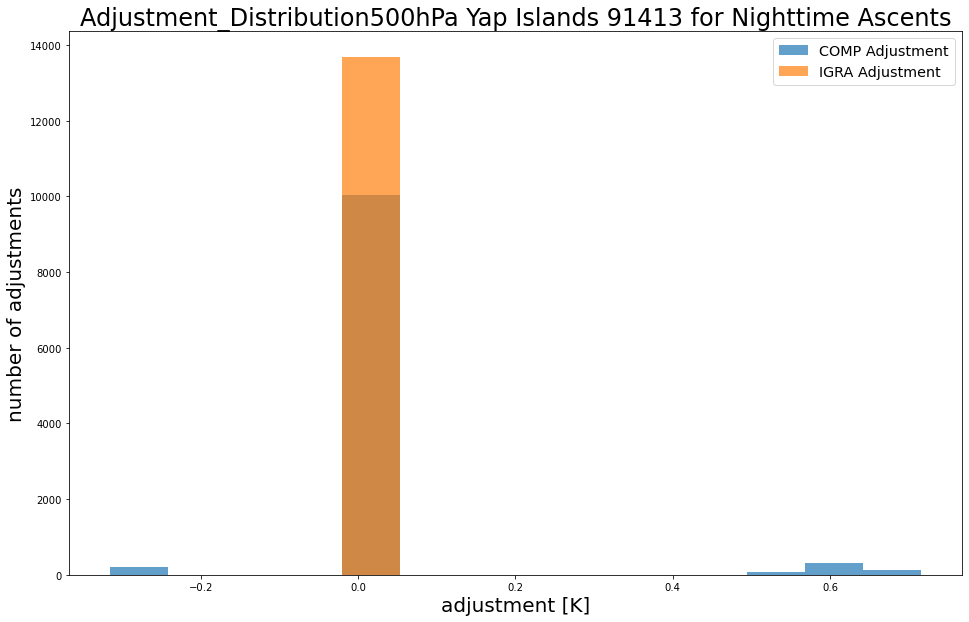

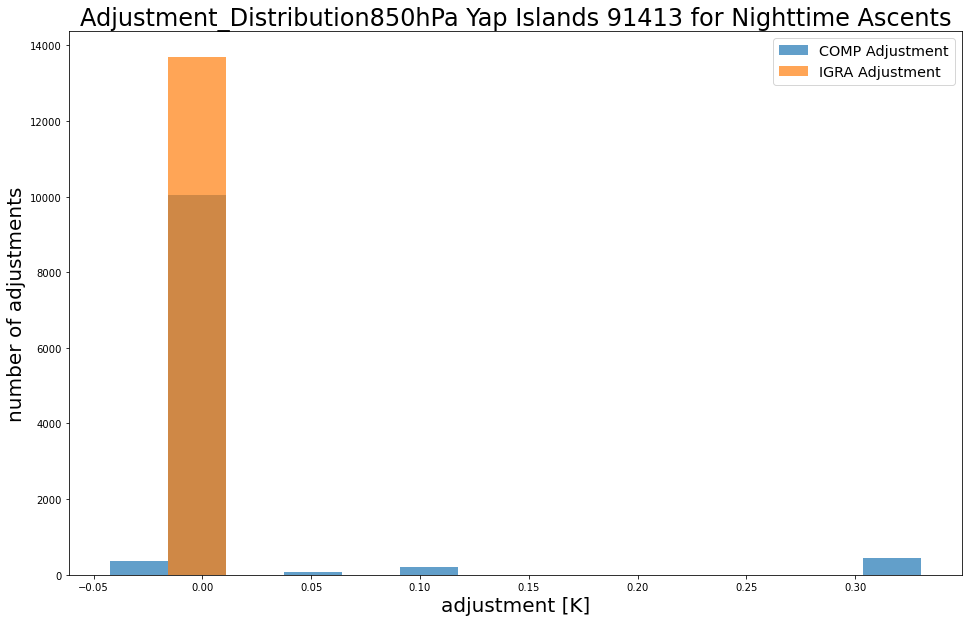

In [26]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if ia.min() < ca.min(): binmin = ia.min()
    else: binmin = ca.min()
    if ia.max() > ca.max(): binmax = ia.max()
    else: binmax = ca.max()
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)